In [1]:
#Source:https://www.kaggle.com/uds5501/chicago-crime-mapping

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
df.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"


In [14]:
df.describe(include = "all")

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,1.456714e+06,1.456714e+06,1456713,1456714,1456714,1456714,1456714,1456714,1455056,1456714,...,1.456700e+06,1.456674e+06,1456714,1.419631e+06,1.419631e+06,1.456714e+06,1456714,1.419631e+06,1.419631e+06,1419631
unique,NaN,NaN,1456598,582146,32774,365,33,342,142,2,...,NaN,NaN,26,NaN,NaN,NaN,959,NaN,NaN,368286
top,NaN,NaN,HZ140230,01/01/2012 12:01:00 AM,001XX N STATE ST,0820,THEFT,SIMPLE,STREET,False,...,NaN,NaN,06,NaN,NaN,NaN,02/04/2016 06:33:39 AM,NaN,NaN,"(41.883500187, -87.627876698)"
freq,NaN,NaN,6,166,3634,136036,329460,150600,330471,1079242,...,NaN,NaN,329460,NaN,NaN,NaN,908366,NaN,NaN,2096
mean,3.308606e+06,9.597550e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.287027e+01,3.745632e+01,NaN,1.164398e+06,1.885523e+06,2.013897e+03,NaN,4.184147e+01,-8.767224e+01,NaN
std,1.235350e+06,8.083505e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.380589e+01,2.144029e+01,NaN,1.850835e+04,3.424775e+04,1.449584e+00,NaN,9.430126e-02,6.661726e-02,NaN
min,3.000000e+00,2.022400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.012000e+03,NaN,3.661945e+01,-9.168657e+01,NaN
25%,2.698636e+06,9.002709e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+01,2.300000e+01,NaN,1.152544e+06,1.858762e+06,2.013000e+03,NaN,4.176787e+01,-8.771528e+01,NaN
50%,3.063654e+06,9.605776e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.300000e+01,3.200000e+01,NaN,1.166021e+06,1.891502e+06,2.014000e+03,NaN,4.185797e+01,-8.766613e+01,NaN
75%,3.428849e+06,1.022577e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400000e+01,5.600000e+01,NaN,1.176363e+06,1.908713e+06,2.015000e+03,NaN,4.190529e+01,-8.762813e+01,NaN


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.shape

(1456714, 23)

In [25]:
df.isnull().any()

Unnamed: 0              False
ID                      False
Case Number              True
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
District                 True
Ward                     True
Community Area           True
FBI Code                False
X Coordinate             True
Y Coordinate             True
Year                    False
Updated On              False
Latitude                 True
Longitude                True
Location                 True
dtype: bool

In [10]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

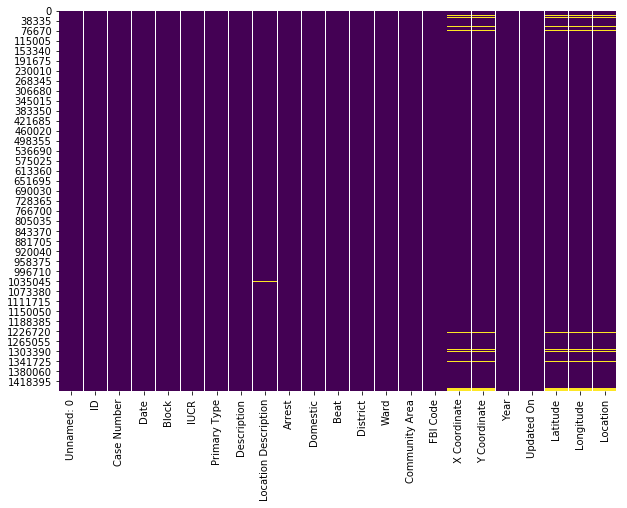

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

In [11]:
df = df.dropna()
df.shape
#df = df.drop(columns=['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR','Domestic', 
                      'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)

IndentationError: unexpected indent (<ipython-input-11-245703b0433a>, line 4)

In [6]:
df.head(2)

,Date,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,Longitude,Location
0,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,29.0,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,42.0,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)"


In [29]:
pd.value_counts(df['Location Description'])[:10]

STREET                            325084
RESIDENCE                         223854
APARTMENT                         179444
SIDEWALK                          158478
OTHER                              53474
PARKING LOT/GARAGE(NON.RESID.)     40907
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25474
Name: Location Description, dtype: int64

In [30]:
pd.value_counts(df['Primary Type'])[:10]

THEFT                  321950
BATTERY                258941
CRIMINAL DAMAGE        152812
NARCOTICS              131177
ASSAULT                 89508
OTHER OFFENSE           85361
BURGLARY                81668
DECEPTIVE PRACTICE      67609
MOTOR VEHICLE THEFT     59856
ROBBERY                 56092
Name: Primary Type, dtype: int64

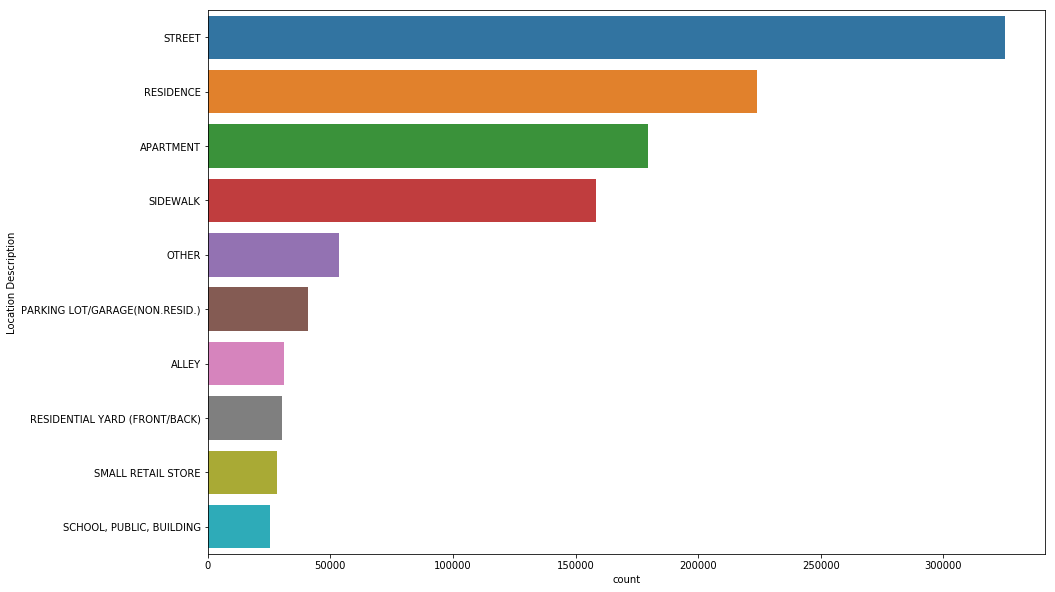

In [31]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:10].index)

In [52]:
df_theft = df[df['Primary Type'] == 'THEFT']
df_theft.head(2)

,Date,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,Longitude,Location
4,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,25.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)"
12,05/03/2016 05:30:00 PM,THEFT,FROM BUILDING,OTHER,False,28.0,2016,41.877812,-87.655758,"(41.877811861, -87.655758012)"


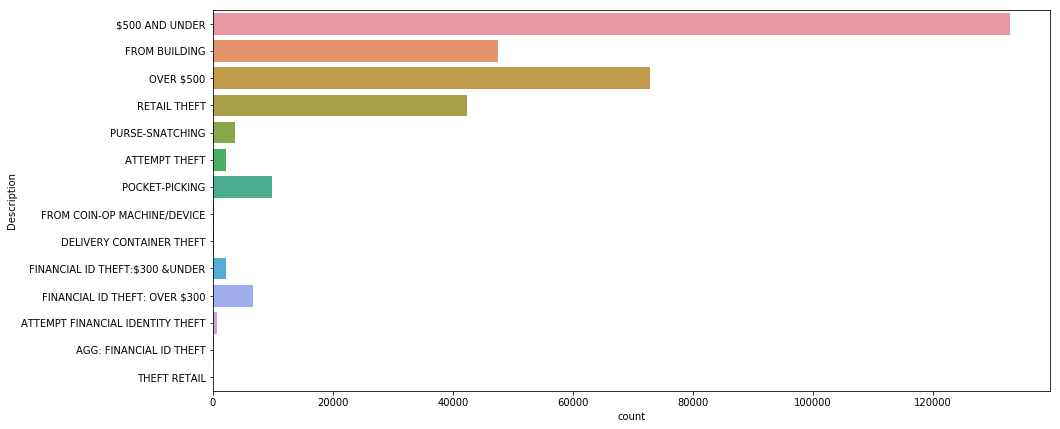

In [33]:
plt.figure(figsize = (15, 7))
sns.countplot(y = df_theft['Description'])

In [36]:
%%time
df_theft['Date'] = pd.to_datetime(df_theft['Date'])

Wall time: 51.6 s


C:\Users\nahrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_theft['Month'] = df_theft['Date'].apply(lambda x : x.month)

C:\Users\nahrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
theft_in_months = pd.DataFrame({"thefts" : df_theft['Month'].value_counts(), "month" : df_theft["Month"].value_counts().index}, index = range(12))

In [39]:
theft_in_months.fillna(0, inplace=True)
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])

In [40]:
theft_in_months.head()

,thefts,month
9,29039.0,1
11,25791.0,2
10,28556.0,3
8,31238.0,4
5,27630.0,5


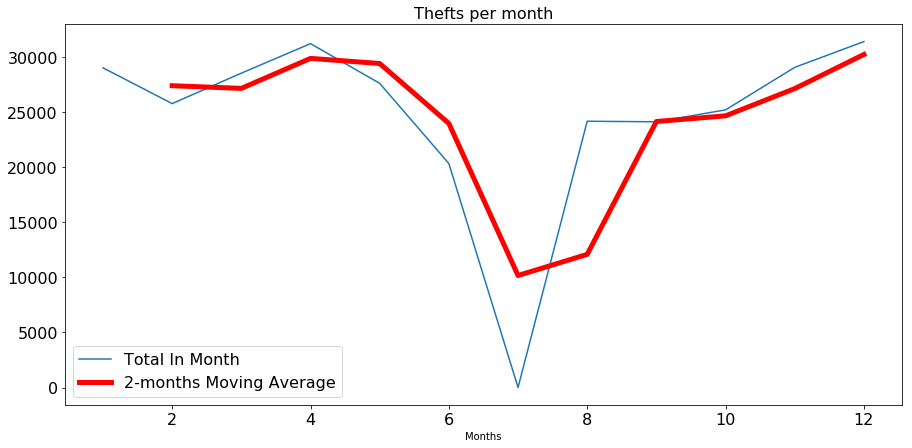

In [41]:
plt.figure(figsize = (15,7))
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='red', linewidth=5, label='2-months Moving Average' )

plt.title('Thefts per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [42]:
print(max(df_theft['Date']))
print(min(df_theft['Date']))

2016-12-31 23:59:00
2012-01-01 00:00:00


In [43]:
df_theft['Date'].iloc[0].date()

datetime.date(2016, 5, 3)

In [44]:
df_theft_dates = df_theft['Location']
df_theft_dates.index = df_theft['Date']
resampled = df_theft_dates.resample('D')
df_theft_dates['MEAN'] = resampled.size().mean()
df_theft_dates['STD'] = resampled.size().std()

C:\Users\nahrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\nahrin\Anaconda3\lib\site-packages\pandas\core\series.py:914: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\nahrin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\nahrin\Ana

In [45]:
UCL = df_theft_dates['MEAN'] + 3 * df_theft_dates['STD']
LCL = df_theft_dates['MEAN'] -  3 * df_theft_dates['STD']

Wall time: 247 ms


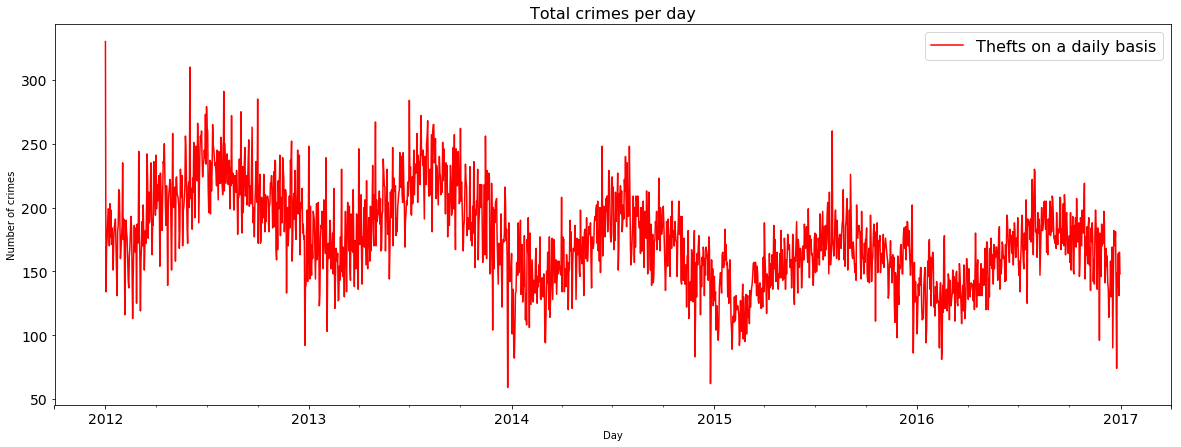

In [46]:
%%time

plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Thefts on a daily basis", color = 'red')
# plt.plot(y = UCL,x = resampled.index, color='red', ls='--', linewidth=1.5, label='UCL')

# LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
# df_theft_dates['MEAN'].plot(color='red', linewidth=2, label='Average')

plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

In [47]:
df_public_peace =  df[df['Primary Type'] == 'PUBLIC PEACE VIOLATION']

In [48]:
df_public_data = pd.DataFrame({"Counts": df_public_peace['Description'].value_counts(), "Description" : df_public_peace['Description'].value_counts().index})
df_public_data.reset_index(inplace=True)
df_public_data = df_public_data.drop(columns=['index'], axis = 1)
df_public_data.head()

,Counts,Description
0,9893,RECKLESS CONDUCT
1,728,BOMB THREAT
2,598,ARSON THREAT
3,558,OTHER VIOLATION
4,507,FALSE POLICE REPORT


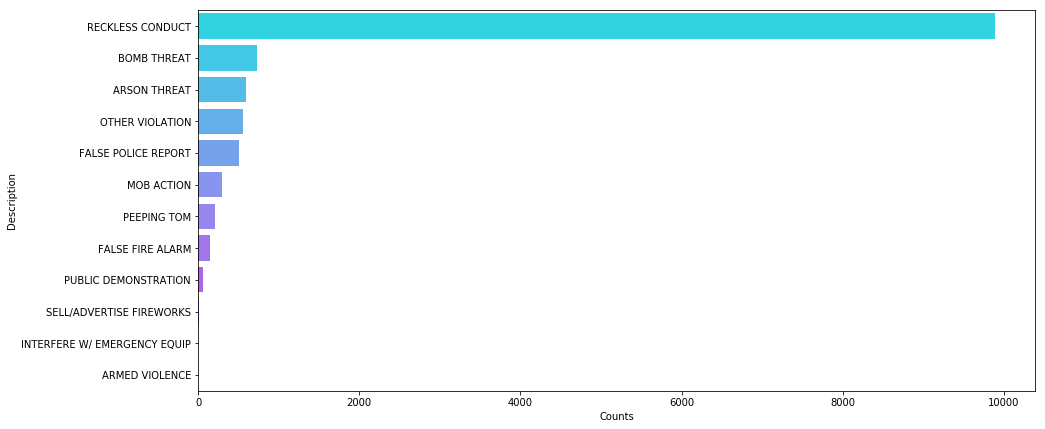

In [49]:
plt.figure(figsize = (15, 7))
sns.barplot(y ="Description", x = "Counts", data = df_public_data, palette="cool")

In [50]:
unique_locations_bombs = df_public_peace['Location'].value_counts()

In [51]:
PB_index = pd.DataFrame({"Raw_String" : unique_locations_bombs.index, "ValueCount":unique_locations_bombs})
PB_index.index = range(len(unique_locations_bombs))
PB_index.head()

,Raw_String,ValueCount
0,"(41.754168689, -87.601635756)",54
1,"(41.78210152, -87.586502002)",54
2,"(41.946542477, -87.736084376)",50
3,"(41.807650669, -87.643080489)",48
4,"(41.73365047, -87.557845321)",39
